<a href="https://colab.research.google.com/github/purendra25/ds/blob/master/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Importing the dataset

In [112]:
dataSet = pd.read_csv('Position_Salaries.csv')
X = dataSet.iloc[:,1:-1].values
y = dataSet.iloc[:,-1].values
print(X)
y = y.reshape(len(y),1)

print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [107]:
from sklearn.preprocessing import StandardScaler

In [113]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X = sc_x.fit_transform(X)
y = sc_y.fit_transform(y)

#print(X)
#print(y)

## Training the SVR model on the whole dataset

In [114]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [115]:
y_predict = svr.predict(sc_x.transform([[6.5]]))
x_predict_inv = sc_y.inverse_transform(y_predict)
print(x_predict_inv)
# sc_y.inverse_transform(svr.predict(sc_x.transform([[6.5]])))


[170370.0204065]


## Visualising the SVR results

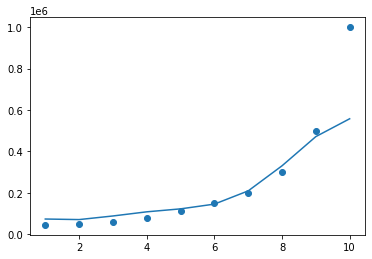

In [118]:
plt.scatter(sc_x.inverse_transform(X),sc_y.inverse_transform(y))
plt.plot(sc_x.inverse_transform(X),sc_y.inverse_transform(svr.predict(X)))
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

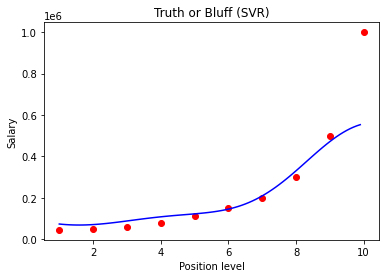

In [121]:
X_grid = np.arange(min(sc_x.inverse_transform(X)), max(sc_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_x.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(svr.predict(sc_x.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()